In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"

DATA_PATH = "../../data/"

# Data preprocessing

In [2]:
anime_df = pd.read_csv(DATA_PATH + "anime.csv")
anime_df.shape

(17562, 35)

In [3]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [4]:
anime_df.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [6]:
scores_features = [f'Score-{i}' for i in range(1, 11)]

anime_df = anime_df.drop(columns=scores_features)
anime_df = anime_df.drop(columns=['Japanese name', 'Premiered',
                                  'Members', 'Watching', 
                                  'Completed', 'On-Hold', 
                                  'Dropped', 'Plan to Watch', 
                                  'Licensors', 'Producers', 'Studios'])

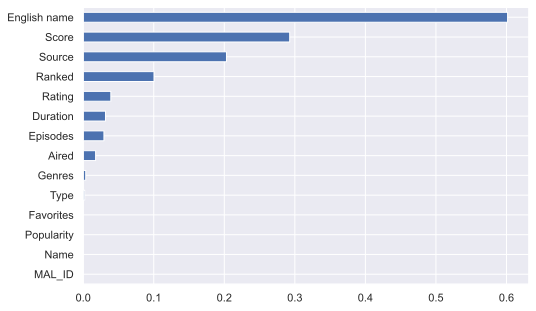

In [7]:
anime_df = anime_df.replace('Unknown', np.NaN)
(anime_df.isnull().sum() / len(anime_df)).sort_values().plot(kind='barh');

In [8]:
def get_types(df):
    df = df.copy()
    for col in df.columns:
        try:
            df[col] = df[col].astype(float)
        except:
            pass
        
    return df

anime_df = get_types(anime_df)

In [9]:
numeric_cols = [col for col in anime_df.columns if anime_df[col].dtype == float and col != 'MAL_ID']

In [10]:
np.random.seed(22)
mean_score = anime_df['Score'].mean()
std_score = anime_df['Score'].std()
anime_df['Name'] = anime_df[['Name', 'English name']].apply(lambda x: x['Name'] if pd.isna(x['English name']) else x['English name'], axis=1)
anime_df['Score'].apply(lambda x: np.random.normal(loc=mean_score, scale=std_score, size=1)[0] if pd.isna(x) else x)
anime_df['Source'].fillna('Unknown', inplace=True)
anime_df = anime_df.drop(columns=['Ranked', 'English name'])
anime_df.dropna(inplace=True)

In [11]:
(anime_df.isnull().sum() / len(anime_df)).sort_values()

MAL_ID        0.0
Name          0.0
Score         0.0
Genres        0.0
Type          0.0
Episodes      0.0
Aired         0.0
Source        0.0
Duration      0.0
Rating        0.0
Popularity    0.0
Favorites     0.0
dtype: float64

In [12]:
anime_sypnopsis = pd.read_csv(DATA_PATH + 'anime_with_synopsis.csv')
anime_sypnopsis.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [13]:
anime_sypnopsis = anime_sypnopsis.drop(columns=['Name', 'Score', 'Genres'])

In [14]:
(anime_sypnopsis.isnull().sum() / len(anime_sypnopsis)).sort_values()

MAL_ID       0.000000
sypnopsis    0.000493
dtype: float64

In [15]:
anime_sypnopsis.dropna(inplace=True)

In [16]:
anime_full = pd.merge(anime_df, anime_sypnopsis, on='MAL_ID', how='inner')

In [17]:
anime_full.head()

,MAL_ID,Name,Score,Genres,Type,Episodes,Aired,Source,Duration,Rating,Popularity,Favorites,sypnopsis
0,1.0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Original,24 min. per ep.,R - 17+ (violence & profanity),39.0,61971.0,"In the year 2071, humanity has colonized sever..."
1,5.0,Cowboy Bebop:The Movie,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,"Sep 1, 2001",Original,1 hr. 55 min.,R - 17+ (violence & profanity),518.0,1174.0,"other day, another bounty—such is the life of ..."
2,6.0,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Manga,24 min. per ep.,PG-13 - Teens 13 or older,201.0,12944.0,"Vash the Stampede is the man with a $$60,000,0..."
3,7.0,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Original,25 min. per ep.,PG-13 - Teens 13 or older,1467.0,587.0,ches are individuals with special powers like ...
4,8.0,Beet the Vandel Buster,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Manga,23 min. per ep.,PG - Children,4369.0,18.0,It is the dark century and the people are suff...


In [18]:
genres = set(anime_full['Genres'].dropna().values)
unique_genres = []
for genres_str in genres:
    for genre in genres_str.split(sep=', '):
        if genre.replace(',', ' ') not in unique_genres:
            unique_genres.append(genre)

In [19]:
for genre in unique_genres:
    anime_full[genre] = anime_full['Genres'].apply(lambda x: 1 if not pd.isna(x) and genre in x.split(', ') else 0)
anime_full = anime_full.drop(columns='Genres')

In [20]:
anime_full.tail()

,MAL_ID,Name,Score,Type,Episodes,Aired,Source,Duration,Rating,Popularity,...,Vampire,Game,Super Power,Shoujo Ai,Kids,Police,Slice of Life,Yaoi,Josei,Cars
10877,47307.0,Shin Gengou Nyankogelion,6.41,Music,1.0,"Jan 22, 2021",Original,1 min.,PG - Children,12289.0,...,0,0,0,0,0,0,0,0,0,0
10878,47402.0,Heikousen,7.52,Music,1.0,"Feb 5, 2021",Original,4 min.,G - All Ages,10869.0,...,0,0,0,0,0,0,0,0,0,0
10879,47614.0,Cooking with Valkyries Spring Festival Special,6.83,Special,1.0,"Feb 11, 2021",Game,10 min.,PG - Children,11973.0,...,0,0,0,0,0,0,1,0,0,0
10880,47616.0,The Promised Neverland Season 2 Episode 5.5,4.81,Special,1.0,"Feb 12, 2021",Manga,23 min.,R - 17+ (violence & profanity),4398.0,...,0,0,0,0,0,0,0,0,0,0
10881,48456.0,SK∞: Crazy Rock Jam,6.52,Special,1.0,"Mar 14, 2021",Original,23 min.,PG-13 - Teens 13 or older,4830.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def time_string_to_minutes(time_string):
    time_list = time_string.split()
    total_minutes = 0
    for i in range(len(time_list)):
        if time_list[i] == 'hr.':
            total_minutes += int(time_list[i-1]) * 3600
        elif time_list[i] == 'min.':
            total_minutes += int(time_list[i-1]) * 60
        elif time_list[i] == 'sec.':
            total_minutes += int(time_list[i-1])
    return total_minutes

In [22]:
anime_full['Duration'] = anime_full['Duration'].apply(time_string_to_minutes)

In [23]:
anime_full.head()

,MAL_ID,Name,Score,Type,Episodes,Aired,Source,Duration,Rating,Popularity,...,Vampire,Game,Super Power,Shoujo Ai,Kids,Police,Slice of Life,Yaoi,Josei,Cars
0,1.0,Cowboy Bebop,8.78,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Original,1440,R - 17+ (violence & profanity),39.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,Cowboy Bebop:The Movie,8.39,Movie,1.0,"Sep 1, 2001",Original,6900,R - 17+ (violence & profanity),518.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,Trigun,8.24,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Manga,1440,PG-13 - Teens 13 or older,201.0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,Witch Hunter Robin,7.27,TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Original,1500,PG-13 - Teens 13 or older,1467.0,...,0,0,0,0,0,1,0,0,0,0
4,8.0,Beet the Vandel Buster,6.98,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Manga,1380,PG - Children,4369.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
seasons_dict = {
    "Mar": "spring",
    "Oct": "autumn",
    "Apr": "spring",
    "Jan": "winter",
    "Dec": "winter",
    "Sep": "autumn",
    "Jul": "summer",
    "Aug": "summer",
    "Nov": "autumn",
    "May": "spring",
    "Jun": "summer",
    "Feb": "winter"
}

In [25]:
anime_full['Aired'] = anime_full['Aired'].apply(lambda x: x.replace(',', ''))

In [26]:
anime_full['season'] = anime_full['Aired'].apply(lambda x: seasons_dict.get(x.split()[0], 'Unknown'))

In [27]:
def get_year(x):
    for elem in x.split():
        if len(elem) == 4:
            try:
                return int(elem)
            except:
                continue

In [28]:
anime_full['year'] = anime_full['Aired'].apply(get_year)

In [29]:
anime_full = anime_full.drop(columns='Aired')

In [30]:
anime_full.head()

,MAL_ID,Name,Score,Type,Episodes,Source,Duration,Rating,Popularity,Favorites,...,Super Power,Shoujo Ai,Kids,Police,Slice of Life,Yaoi,Josei,Cars,season,year
0,1.0,Cowboy Bebop,8.78,TV,26.0,Original,1440,R - 17+ (violence & profanity),39.0,61971.0,...,0,0,0,0,0,0,0,0,spring,1998
1,5.0,Cowboy Bebop:The Movie,8.39,Movie,1.0,Original,6900,R - 17+ (violence & profanity),518.0,1174.0,...,0,0,0,0,0,0,0,0,autumn,2001
2,6.0,Trigun,8.24,TV,26.0,Manga,1440,PG-13 - Teens 13 or older,201.0,12944.0,...,0,0,0,0,0,0,0,0,spring,1998
3,7.0,Witch Hunter Robin,7.27,TV,26.0,Original,1500,PG-13 - Teens 13 or older,1467.0,587.0,...,0,0,0,1,0,0,0,0,summer,2002
4,8.0,Beet the Vandel Buster,6.98,TV,52.0,Manga,1380,PG - Children,4369.0,18.0,...,0,0,0,0,0,0,0,0,autumn,2004


In [31]:
set(anime_full['Rating'].values)

{'G - All Ages',
 'PG - Children',
 'PG-13 - Teens 13 or older',
 'R - 17+ (violence & profanity)',
 'R+ - Mild Nudity'}

In [32]:
rating_dict = {'G - All Ages': 0, 
               'PG - Children': 7, 
               'PG-13 - Teens 13 or older': 13, 
               'R - 17+ (violence & profanity)': 18, 
               'R+ - Mild Nudity': 18}

In [33]:
anime_full['Rating'] = anime_full['Rating'].apply(lambda x: rating_dict[x])

In [34]:
anime_full.head()

,MAL_ID,Name,Score,Type,Episodes,Source,Duration,Rating,Popularity,Favorites,...,Super Power,Shoujo Ai,Kids,Police,Slice of Life,Yaoi,Josei,Cars,season,year
0,1.0,Cowboy Bebop,8.78,TV,26.0,Original,1440,18,39.0,61971.0,...,0,0,0,0,0,0,0,0,spring,1998
1,5.0,Cowboy Bebop:The Movie,8.39,Movie,1.0,Original,6900,18,518.0,1174.0,...,0,0,0,0,0,0,0,0,autumn,2001
2,6.0,Trigun,8.24,TV,26.0,Manga,1440,13,201.0,12944.0,...,0,0,0,0,0,0,0,0,spring,1998
3,7.0,Witch Hunter Robin,7.27,TV,26.0,Original,1500,13,1467.0,587.0,...,0,0,0,1,0,0,0,0,summer,2002
4,8.0,Beet the Vandel Buster,6.98,TV,52.0,Manga,1380,7,4369.0,18.0,...,0,0,0,0,0,0,0,0,autumn,2004


In [35]:
(anime_full.isnull().sum() / len(anime_full))

MAL_ID           0.0
Name             0.0
Score            0.0
Type             0.0
Episodes         0.0
Source           0.0
Duration         0.0
Rating           0.0
Popularity       0.0
Favorites        0.0
sypnopsis        0.0
Action           0.0
Military         0.0
Adventure        0.0
Fantasy          0.0
Music            0.0
Romance          0.0
Shoujo           0.0
Dementia         0.0
Psychological    0.0
Drama            0.0
Shounen Ai       0.0
Comedy           0.0
Demons           0.0
Ecchi            0.0
School           0.0
Parody           0.0
Shounen          0.0
Historical       0.0
Seinen           0.0
Mystery          0.0
Sci-Fi           0.0
Space            0.0
Horror           0.0
Martial Arts     0.0
Samurai          0.0
Mecha            0.0
Supernatural     0.0
Thriller         0.0
Magic            0.0
Sports           0.0
Harem            0.0
Vampire          0.0
Game             0.0
Super Power      0.0
Shoujo Ai        0.0
Kids             0.0
Police       

In [36]:
anime_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10882 entries, 0 to 10881
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         10882 non-null  float64
 1   Name           10882 non-null  object 
 2   Score          10882 non-null  float64
 3   Type           10882 non-null  object 
 4   Episodes       10882 non-null  float64
 5   Source         10882 non-null  object 
 6   Duration       10882 non-null  int64  
 7   Rating         10882 non-null  int64  
 8   Popularity     10882 non-null  float64
 9   Favorites      10882 non-null  float64
 10  sypnopsis      10882 non-null  object 
 11  Action         10882 non-null  int64  
 12  Military       10882 non-null  int64  
 13  Adventure      10882 non-null  int64  
 14  Fantasy        10882 non-null  int64  
 15  Music          10882 non-null  int64  
 16  Romance        10882 non-null  int64  
 17  Shoujo         10882 non-null  int64  
 18  Dement

#  EDA

In [37]:
numeric_cols = [col for col in anime_full.columns 
                if anime_full[col].dtype != 'object' and 
                col != 'MAL_ID' and
                col != 'Rating' and 
                col not in unique_genres]
cat_cols = [col for col in anime_full.columns 
            if col not in numeric_cols and 
            col != 'MAL_ID' and 
            col != 'sypnopsis' and 
            col != 'Name' and
            col not in unique_genres]

### Let's look at the distribution of quantitative features

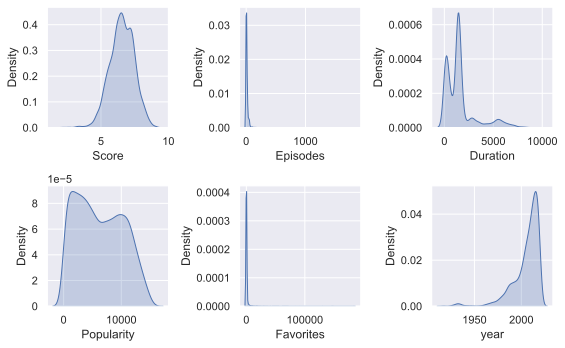

In [38]:
def draw_distribution(df, cols):
    ncols = 3
    nrows = round(len(cols) / ncols)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    for i, col in enumerate(cols):
        ax = axes[int(i / 3), i % 3]
        sns.kdeplot(data=df, x=col, fill=True, ax=ax)
    fig.tight_layout()
    
draw_distribution(anime_full, numeric_cols)

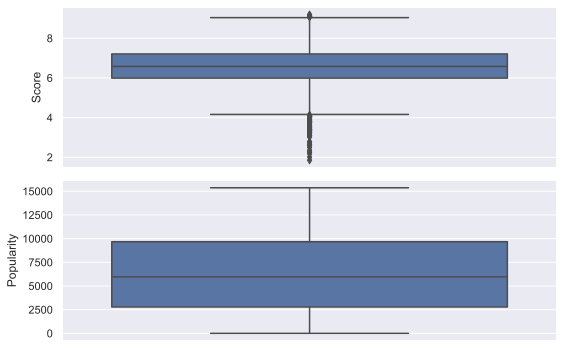

In [39]:
def draw_boxplot(df, cols):
    ncols = 1
    nrows = round(len(cols) / ncols)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    for i, col in enumerate(cols):
        ax = axes[i]
        sns.boxplot(data=df, y=col, ax=ax)
    fig.tight_layout()
    
draw_boxplot(anime_full, ['Score', 'Popularity'])

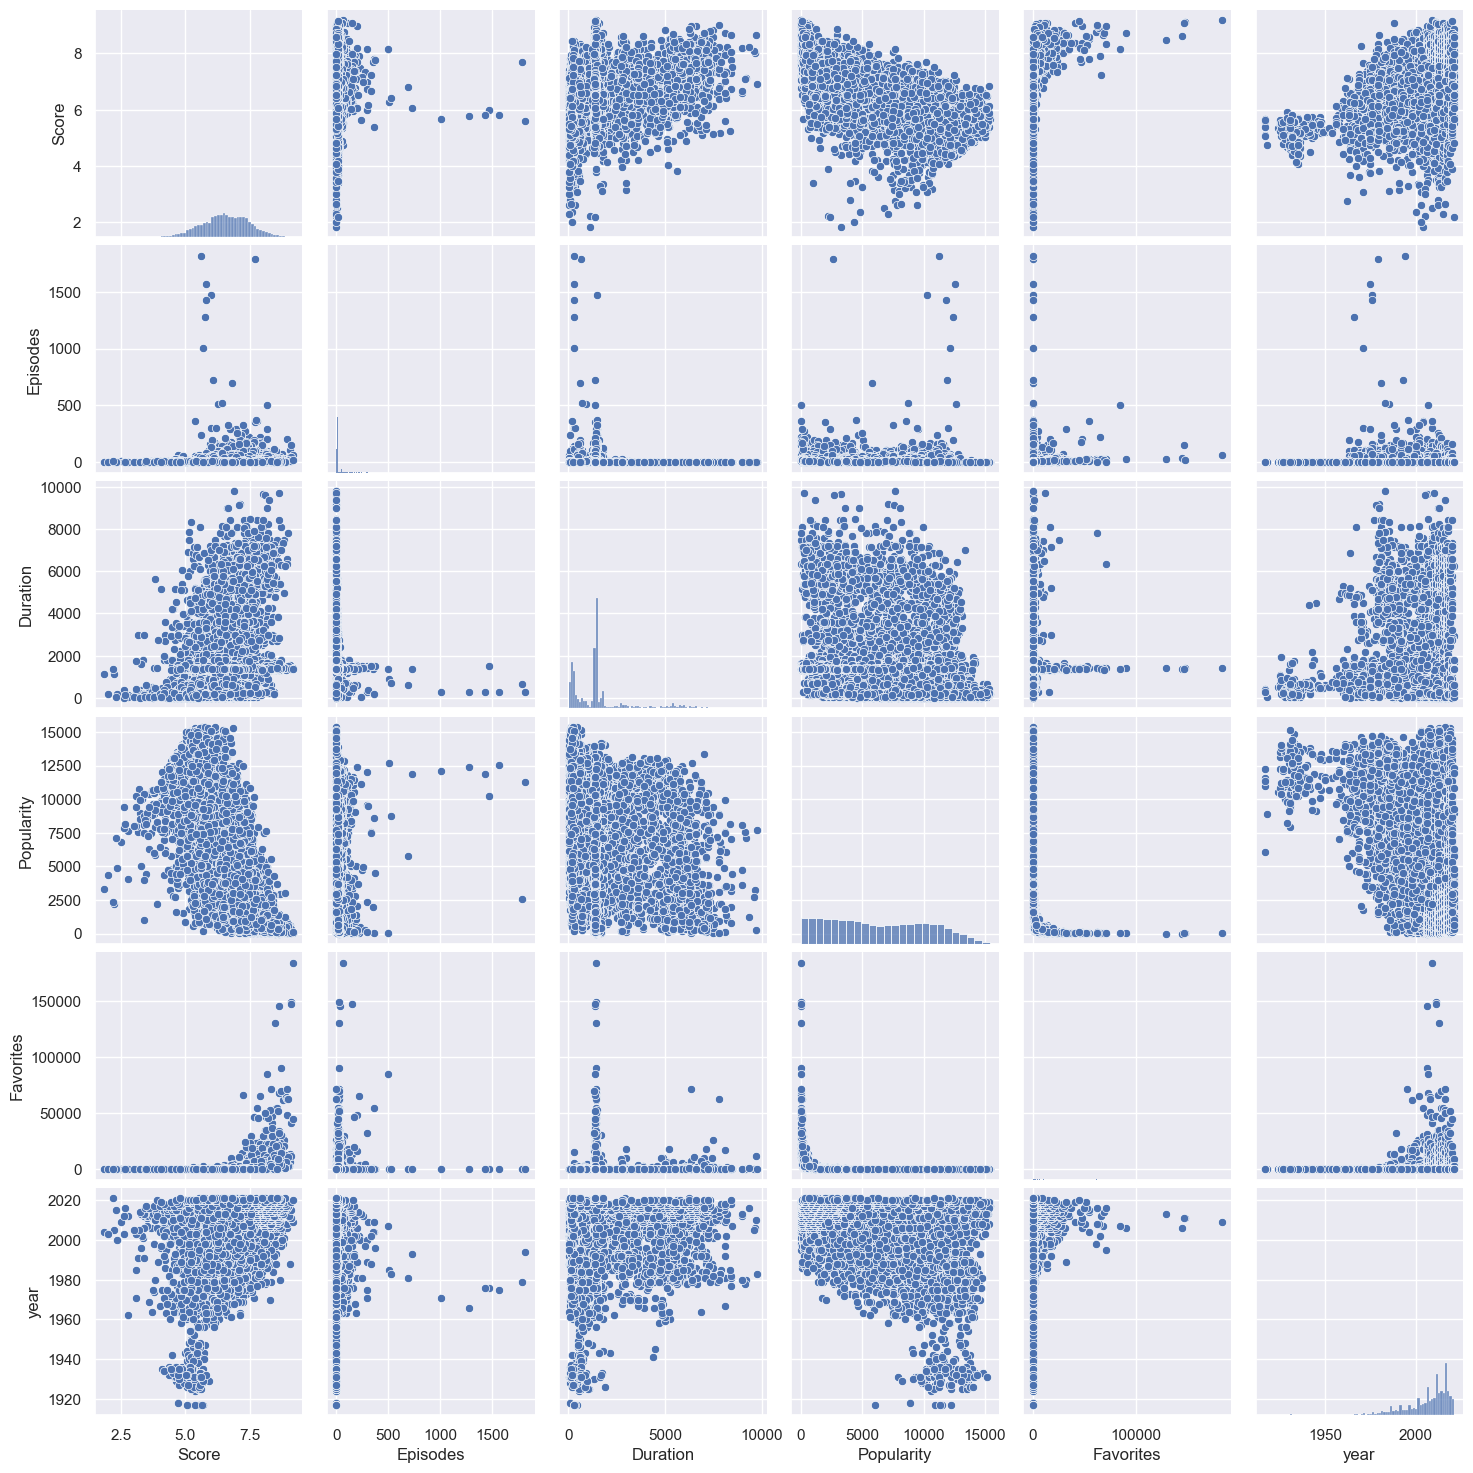

In [40]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(data=anime_full[numeric_cols])
plt.show()

In [41]:
%config InlineBackend.figure_format = 'svg'

### Let's look at the top 5 most popular genres

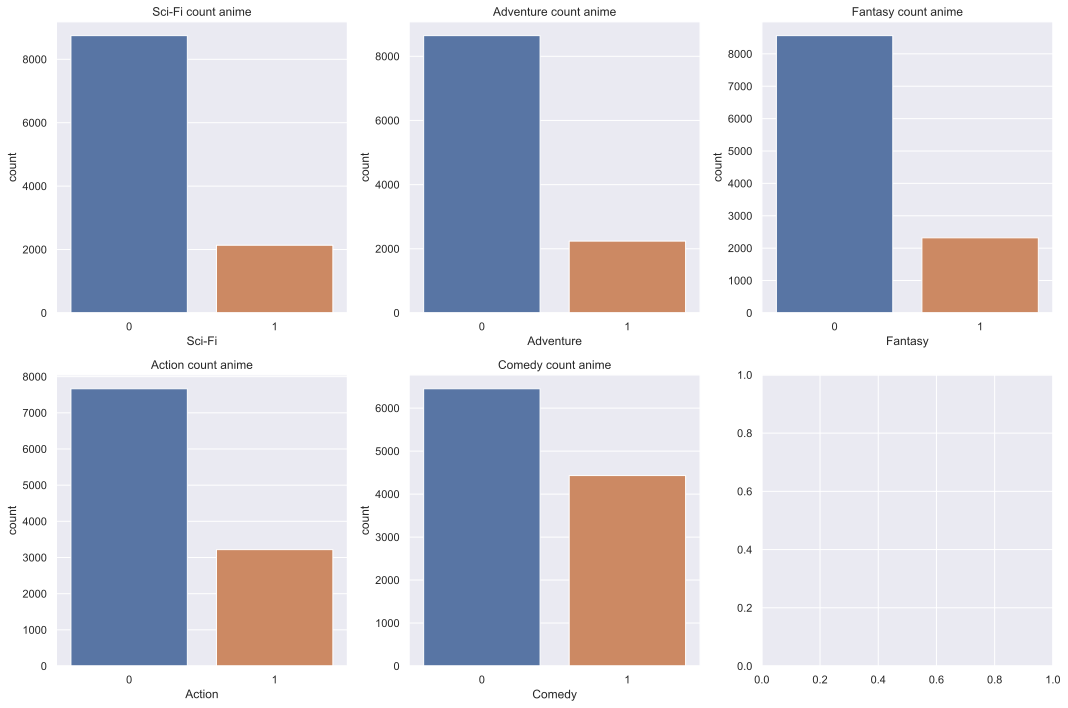

In [42]:
def draw_countplots(df, cols):
    ncols = 3
    nrows = round(len(cols) / ncols)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    for i, col in enumerate(cols):
        ax = axes[int(i / 3), i % 3]
        ax.set_title(f"{col} count anime")
        sns.countplot(data=df, x=col, ax=ax)
    fig.tight_layout()

count_dict = {col: anime_full[col].sum() for col in unique_genres}
count_dict = sorted(count_dict.items(), key=lambda item: item[1])
top5 = [item[0] for item in count_dict[-5:]]
draw_countplots(anime_full, top5)

### Now let's look at the categorical features depending on the Score value. And on the contrary the distribution of Score depending on the categories

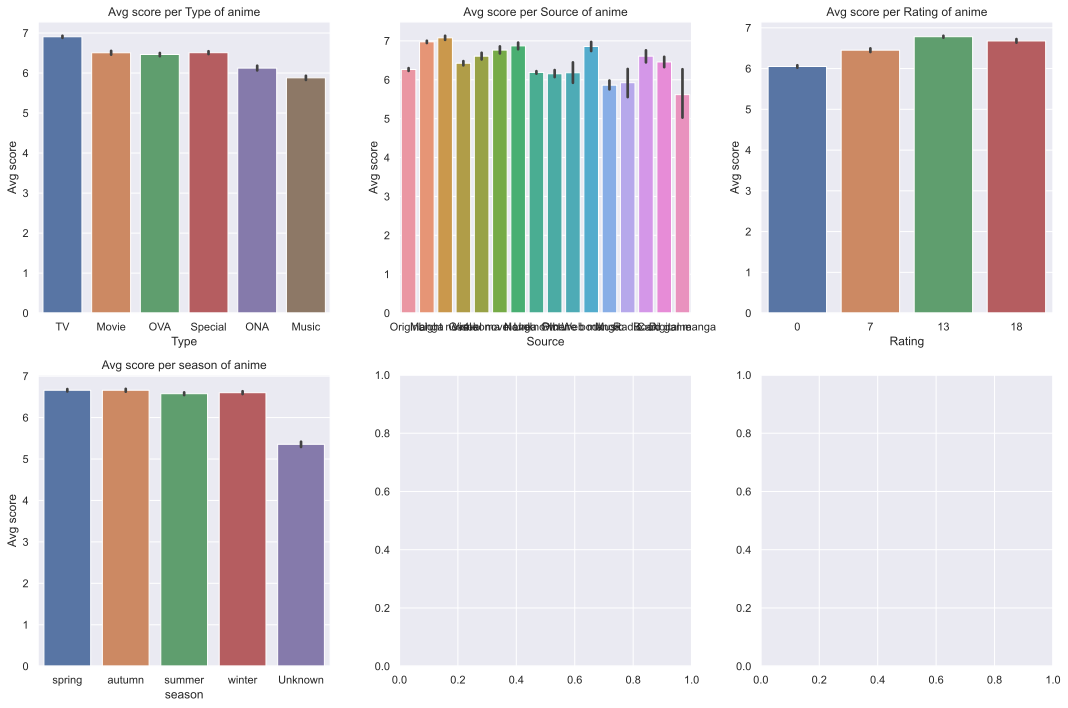

In [43]:
def draw_barplots(df, cols):
    ncols = 3
    nrows = round(len(cols) / ncols) + 1
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    for i, col in enumerate(cols):
        ax = axes[int(i / 3), i % 3]
        ax.set_title(f"Avg score per {col} of anime")
        sns.barplot(data=df, x=col, y='Score', ax=ax)
        ax.set_ylabel("Avg score")
    fig.tight_layout()
    
draw_barplots(anime_full, cat_cols)

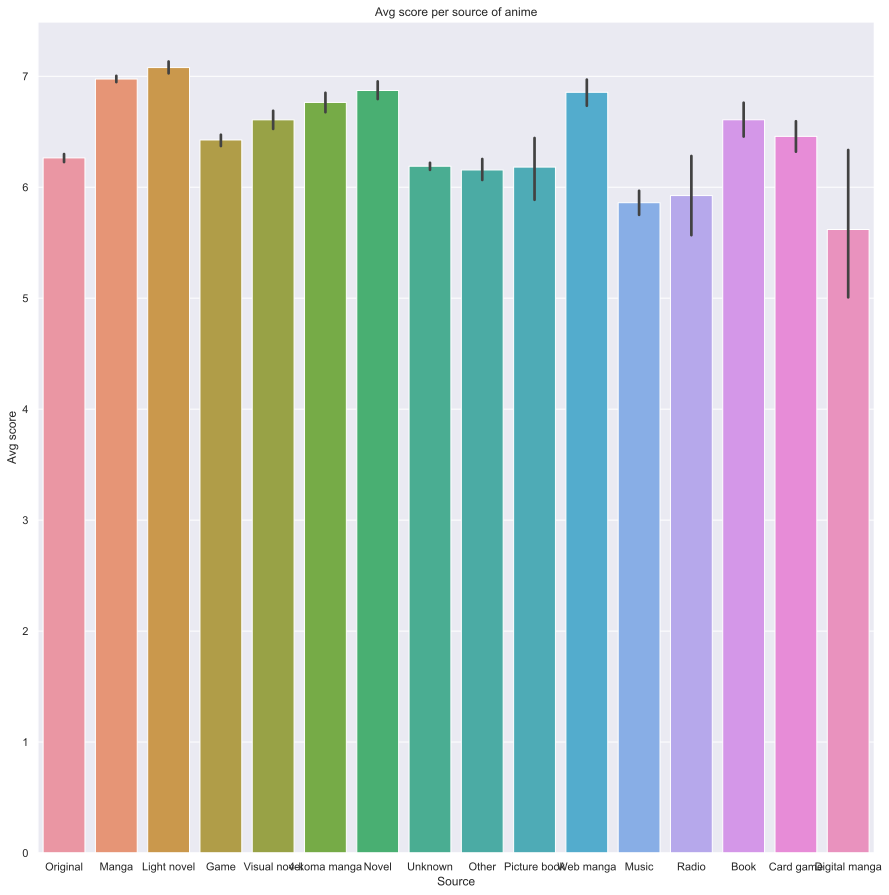

In [44]:
plt.figure(figsize=(15, 15))
sns.barplot(data=anime_full, x='Source', y='Score')
plt.title("Avg score per source of anime")
plt.ylabel("Avg score")
plt.show()

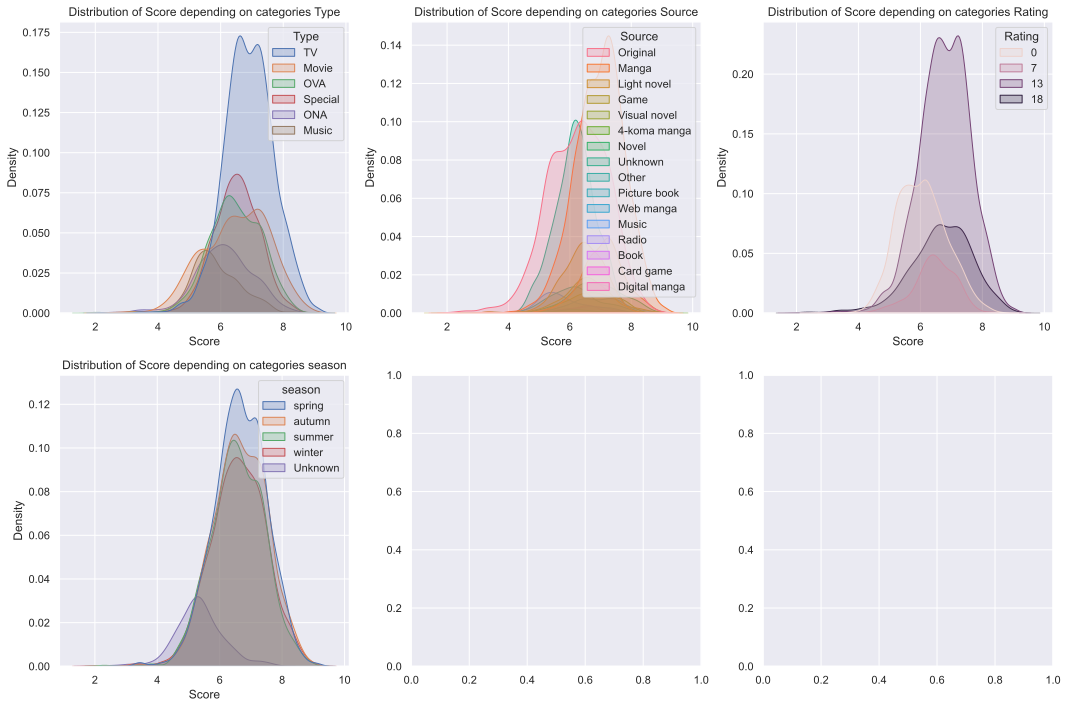

In [45]:
def draw_score_vs_cat(df, cols):
    ncols = 3
    nrows = round(len(cols) / ncols) + 1
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    for i, col in enumerate(cols):
        ax = axes[int(i / 3), i % 3]
        ax.set_title(f"Distribution of Score depending on categories {col}")
        sns.kdeplot(data=df, x='Score', hue=col, ax=ax, fill=True)
    fig.tight_layout()
    
draw_score_vs_cat(anime_full, cat_cols)

### That's all, let's save the dataframe for future use!

In [46]:
anime_full.to_csv(DATA_PATH + 'anime_full.csv', index=False)